In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

# Load the dataset
file_path = "Bakery.csv"
df = pd.read_csv(file_path)

# Grouping items by transactions
transactions = df.groupby("TransactionNo")["Items"].apply(list).tolist()

# Convert transactions into a one-hot encoded DataFrame
unique_items = sorted(set(item for sublist in transactions for item in sublist))
encoded_df = pd.DataFrame(0, index=range(len(transactions)), columns=unique_items)

# Fix: Assign values one by one
for i, items in enumerate(transactions):
    for item in items:  # Assign each item separately
        encoded_df.at[i, item] = 1  

In [10]:
# Apply FP-Growth algorithm
min_support = 0.02  # Adjust based on dataset size
frequent_itemsets = fpgrowth(encoded_df, min_support=min_support, use_colnames=True)

# Display frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets.sort_values(by="support", ascending=False))

# Visualizing the top 10 frequent itemsets
top_items = frequent_itemsets.sort_values(by="support", ascending=False).head(10)

c:\Users\Jain\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
     support                 itemsets
5   0.478394                 (Coffee)
0   0.327205                  (Bread)
8   0.142631                    (Tea)
12  0.103856                   (Cake)
19  0.090016          (Bread, Coffee)
6   0.086107                 (Pastry)
13  0.071844               (Sandwich)
7   0.061807              (Medialuna)
2   0.058320          (Hot chocolate)
28  0.054728           (Cake, Coffee)
3   0.054411                (Cookies)
25  0.049868            (Tea, Coffee)
22  0.047544         (Pastry, Coffee)
15  0.040042                (Brownie)
9   0.039197             (Farm House)
10  0.038563                  (Juice)
4   0.038457                 (Muffin)
31  0.038246       (Sandwich, Coffee)
14  0.036344              (Alfajores)
24  0.035182      (Medialuna, Coffee)
18  0.034548                  (Scone)
11  0.034443                   (Soup)
17  0.033597                  (Toast)
20  0.029583  (Hot chocolate, Coffee)
23  0.029160          (Pastry, 

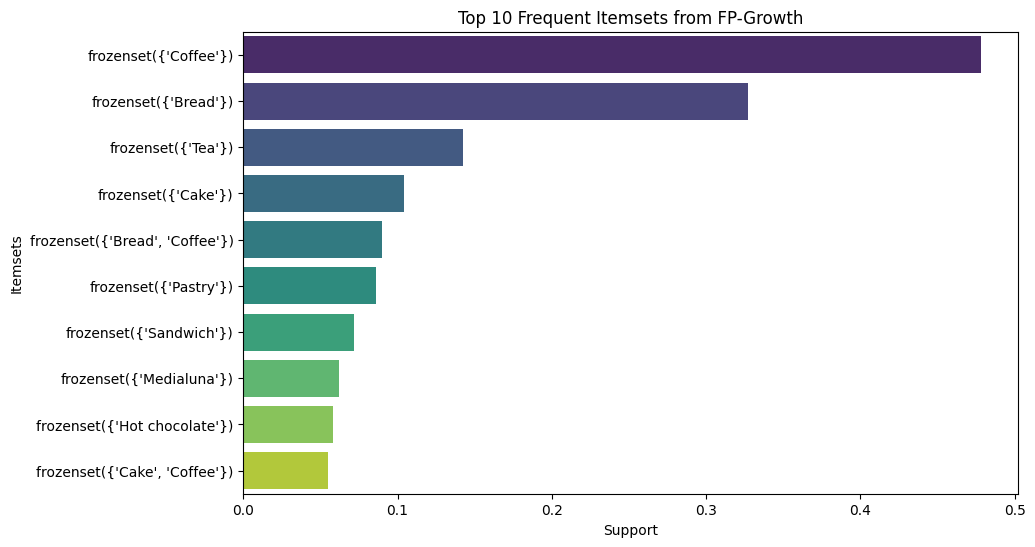

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x="support", y="itemsets", hue="itemsets", data=top_items, palette="viridis", legend=False)
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.title("Top 10 Frequent Itemsets from FP-Growth")
plt.show()

In [12]:
# Generate association rules
min_confidence = 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
print("\nAssociation Rules:")
print(rules.sort_values(by=["confidence", "lift"], ascending=False))


Association Rules:
       antecedents consequents  antecedent support  consequent support  \
7          (Toast)    (Coffee)            0.033597            0.478394   
3      (Medialuna)    (Coffee)            0.061807            0.478394   
2         (Pastry)    (Coffee)            0.086107            0.478394   
4          (Juice)    (Coffee)            0.038563            0.478394   
6       (Sandwich)    (Coffee)            0.071844            0.478394   
5           (Cake)    (Coffee)            0.103856            0.478394   
1        (Cookies)    (Coffee)            0.054411            0.478394   
0  (Hot chocolate)    (Coffee)            0.058320            0.478394   

    support  confidence      lift  representativity  leverage  conviction  \
7  0.023666    0.704403  1.472431               1.0  0.007593    1.764582   
3  0.035182    0.569231  1.189878               1.0  0.005614    1.210871   
2  0.047544    0.552147  1.154168               1.0  0.006351    1.164682   
4  0.